In [5]:
# 加载 Python 依赖
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
print(f"tf.__version__ = {tf.__version__}")

from tfkeras.utils.plot_train import plot_ds_train, plot_tf_ds_train

tf.__version__ = 2.8.0


In [7]:
# 构建数据管道
BATCH_SIZE = 100

def load_image(img_path, size = (32, 32)):
    # label
    label = tf.constant(1, tf.int8) \
            if tf.strings.regex_full_match(img_path, ".*automobiler.*") \
            else tf.constant(0, tf.int8)
    # image
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, size) / 255.0
    return (img, label)

ds_train = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg") \
    .map(load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE) \
    .shuffle(buffer_size = 1000) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.experimental.AUTOTUNE)
ds_test = tf.data.Dataset.list_files("./data/cifar2/test/*/*.jpg") \
    .map(load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.experimental.AUTOTUNE)

x.shape = (100, 32, 32, 3)
y.shape = (100,)


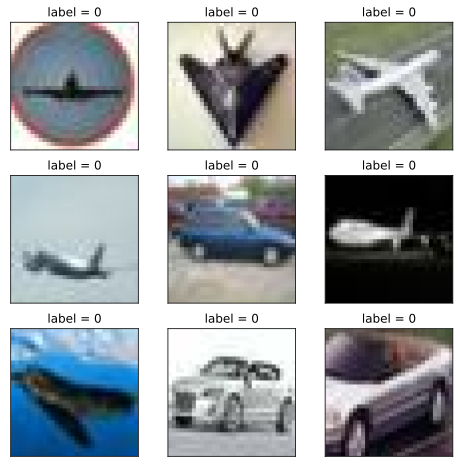

In [12]:
for x, y in ds_train.take(1):
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")

plot_tf_ds_train(ds_train)

In [15]:
# 模型构建
def TensorflowModels():
    tf.keras.backend.clear_session()

    inputs = layers.Input(shape = (32, 32, 3))
    x = layers.Conv2D(32, kernel_size = (3, 3))(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, kernel_size = (5, 5))(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(rate = 0.1)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation = "relu")(x)
    outputs = layers.Dense(1, activation = "sigmoid")(x)

    model = models.Model(
        inputs = inputs, 
        outputs = outputs
    )
    model.summary()
    return model

TensorflowModels()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0     